## PHY644 — Homework 6  
**Maxwell A. Fine**  
**Problem 4**

We are asked to make a plot of the **comoving distance** \( D_c \) as a function of redshift \( z \).

The comoving distance is given by:

$$
D_c(z) = c \int_0^z \frac{dz'}{H_0 \sqrt{ \Omega_m (1+z')^3 + \Omega_r (1+z')^4 + \Omega_\Lambda }}
$$

where:
- $ \Omega_m = 0.3 $ — matter density parameter  
- $ \Omega_r = 8.5 \times 10^{-5} $ — radiation density parameter  
- $ \Omega_\Lambda = 1 - \Omega_m - \Omega_r $ — cosmological constant density parameter  
- $ H_0 $ — Hubble constant  
- $ c $ — speed of light  

We will numerically evaluate this integral to obtain $ D_c(z) $ and plot it as a function of $ z $, you can probably do it analytically but why?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 
from astropy.constants import c
from astropy import units as u
from scipy.integrate import quad

H0 = Planck18.H0  # Hubble constant today

# Given parameters
Omega_m = 0.3
Omega_r = 8.5e-5
Omega_k = 0.0
Omega_L = 1.0 - Omega_m - Omega_r





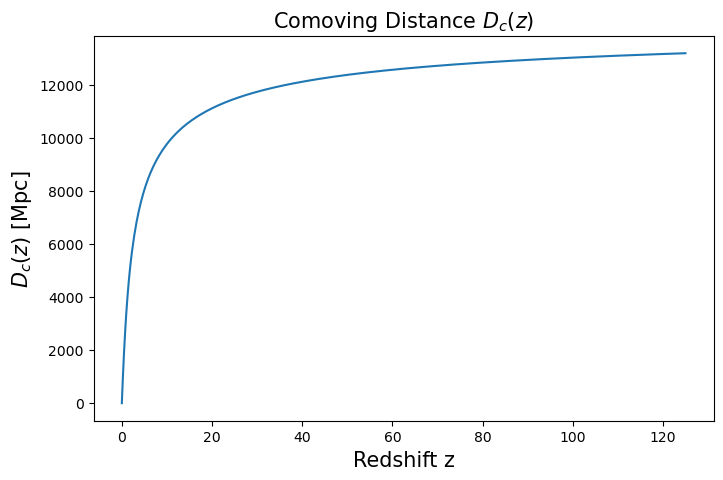

In [24]:
H0_val = H0.to(u.km / u.s / u.Mpc).value  # numerical value
c_km_s = c.to(u.km / u.s).value  # speed of light in km/s


# Define H(z)
def H_z(z):
    return H0_val * np.sqrt(Omega_m * (1 + z)**3 +
                            Omega_r * (1 + z)**4 +
                            Omega_k * (1 + z)**2 +
                            Omega_L)

# Define comoving distance integrand
def integrand(z):
    return c_km_s / H_z(z)

# Compute comoving distance using quad
z_vals = np.linspace(0, 125, 500)  # fewer points are fine with quad
Dc_vals = np.array([quad(integrand, 0, z)[0] for z in z_vals])

# Plot
plt.figure(figsize=(8, 5))
plt.plot(z_vals, Dc_vals)
plt.title("Comoving Distance $D_c(z)$", size=15)
plt.xlabel("Redshift z", size=15)
plt.ylabel("$D_c(z)$ [Mpc]", size=15)
plt.show()
plt.show()

## Problem 4B

Compute the comoving distance to the edge of the observable Universe.


The Big Bang happens at $ t = 0$ \Rightarrow $z = \infty$

So we can reuse the same code, and put redshift on a log scale, and go out to some high number - given our 4A we expect it to approach an asymptote. 



Using H0 = 67.660 km/s/Mpc
z    D_c (Mpc)      D_c (Gpc)     D_c (Gly)
1.0e+01     9.762e+03       9.762      31.841
1.0e+02     1.301e+04      13.015      42.449
1.0e+03     1.407e+04      14.068      45.884
1.0e+04     1.433e+04      14.331      46.741
1.0e+05     1.437e+04      14.370      46.870
1.0e+06     1.437e+04      14.375      46.884


/tmp/ipykernel_16074/2972527790.py:13: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  result, _ = quad(lambda zp: c_km_s / H_of_z(zp), 0, z, epsabs=1e-8, epsrel=1e-8)
/tmp/ipykernel_16074/2972527790.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(lambda zp: c_km_s / H_of_z(zp), 0, z, epsabs=1e-8, epsrel=1e-8)


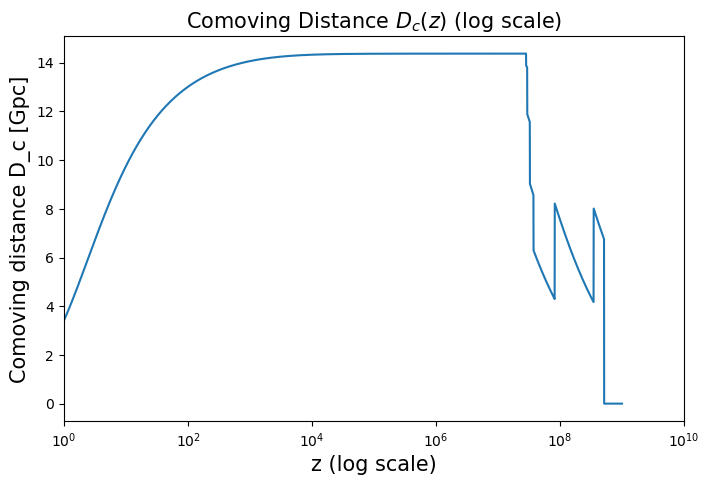

In [23]:
from scipy.integrate import quad


def H_of_z(z):
    return H0_val * np.sqrt(Omega_m * (1 + z)**3 +
                            Omega_r * (1 + z)**4 +
                            Omega_k * (1 + z)**2 +
                            Omega_L)

def comoving_distance(z):
    """Compute D_c(z) in Mpc using adaptive quadrature."""
    if np.isscalar(z):
        result, _ = quad(lambda zp: c_km_s / H_of_z(zp), 0, z, epsabs=1e-8, epsrel=1e-8)
        return result
    else:
        return np.array([comoving_distance(zi) for zi in z])

# Test redshifts
z_tests = np.array([10, 100, 1e3, 1e4, 1e5, 1e6])
Dc_vals_Mpc = comoving_distance(z_tests)

# Conversions
Mpc_to_Gpc = 1e-3
Mpc_to_ly = 3.085677581e22 / 9.4607e15  # meters per Mpc / meters per ly
Mpc_to_Gly = Mpc_to_ly / 1e9

Dc_vals_Gpc = Dc_vals_Mpc * Mpc_to_Gpc
Dc_vals_Gly = Dc_vals_Mpc * Mpc_to_Gly

# Print results
print(f"Using H0 = {H0_val:.3f} km/s/Mpc")
print("z    D_c (Mpc)      D_c (Gpc)     D_c (Gly)")
for zi, dMpc, dGpc, dGly in zip(z_tests, Dc_vals_Mpc, Dc_vals_Gpc, Dc_vals_Gly):
    print(f"{zi:7.1e}  {dMpc:12.3e}  {dGpc:10.3f}  {dGly:10.3f}")

# Quick plot
z_plot = np.logspace(0, 9, 4000)  # fewer points since quad is accurate
Dc_plot_Mpc = comoving_distance(z_plot)

plt.figure(figsize=(8,5))
plt.plot(z_plot, Dc_plot_Mpc * Mpc_to_Gpc)
plt.xscale('log')
plt.xlabel('z (log scale)', size=15)
plt.ylabel('Comoving distance D_c [Gpc]', size=15)
plt.title("Comoving Distance $D_c(z)$ (log scale)", size=15)
plt.xlim(1e0, 1e10)
plt.show()
